# Covid Data Analysis

Analysis with pandas

## Standard Libraries Importation

In [11]:
import numpy as np
import pandas as pd
import urllib.request
import matplotlib.pyplot as plt

## Data import

In [12]:
URL = "https://www.data.gouv.fr/fr/datasets/r/63352e38-d353-4b54-bfd1-f1b3ee1cabd7"
file = urllib.request.urlopen(URL)
df = pd.read_csv(file, header=0, sep=";")

In [13]:
# affec index = jour
df['jour'] = pd.to_datetime(df['jour'])
df = df.set_index('jour')

In [14]:
# Groupby sexe=0
grouped = df.groupby("sexe")
df1 = grouped.get_group(0)

# Groupby day
grouped2 = df1.groupby('jour')

In [15]:
Date = df1.index.unique()
lst = df.columns[2:8]

In [16]:
DataLst = []
# Sum data on each day (by department) on the index
for i in range(6):
    Tmp = [grouped2.get_group(t)[lst[i]].sum() for t in Date]
    DataLst.append(Tmp)

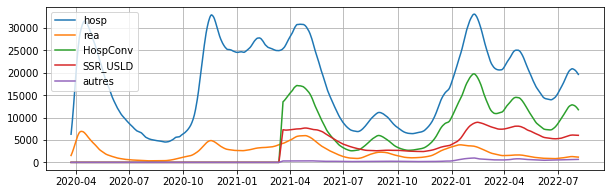

In [19]:
# window 7 days for Moving Average
window = 7
# Plotting
plt.figure(figsize=(10, 3))
for i in range(5):
    Tmp = pd.Series(DataLst[i]).rolling(window).mean()
    plt.plot(Date, Tmp, label=lst[i])
plt.grid(True)
plt.legend()